In [1]:
from cnn_parallell import experiment1, experiment2, experiment3
import numpy as np
import mnist
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
SUBSET_SIZE = 5000

imgs = mnist.train_images()/255.0
labels = mnist.train_labels()
dataset = imgs[0:SUBSET_SIZE, 1:, 1:]
labels = labels[0:SUBSET_SIZE]
subset_flattened = dataset.reshape(SUBSET_SIZE, 27*27)

X_train, X_test, y_train, y_test = train_test_split(subset_flattened, 
                                                    labels,
                                                    test_size=0.25,
                                                    random_state=0)

def trainer_baseline():
    clf = LogisticRegression(fit_intercept=True,
                             multi_class='auto',
                             penalty='l1',
                             solver='saga',
                             max_iter=1000,
                             C=50,
                             verbose=2,
                             n_jobs=8,
                             tol=0.01
                            )
    clf.fit(X_train, y_train)
    return clf

In [5]:
pred = trainer_baseline()

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


Epoch 1, change: 1.00000000
Epoch 2, change: 0.20855554
Epoch 3, change: 0.10772298
Epoch 4, change: 0.08218583
Epoch 5, change: 0.07496478
Epoch 6, change: 0.04968577
Epoch 7, change: 0.04854913
Epoch 8, change: 0.04419281
Epoch 9, change: 0.04069670
Epoch 10, change: 0.03732601
Epoch 11, change: 0.03352282
Epoch 12, change: 0.03487546
Epoch 13, change: 0.03138197
Epoch 14, change: 0.03012080
Epoch 15, change: 0.02718711
Epoch 16, change: 0.02563016
Epoch 17, change: 0.02474534
Epoch 18, change: 0.02533910
Epoch 19, change: 0.02247617
Epoch 20, change: 0.02456857
Epoch 21, change: 0.02061267
Epoch 22, change: 0.02017885
Epoch 23, change: 0.01968719
Epoch 24, change: 0.01848899
Epoch 25, change: 0.01780623
Epoch 26, change: 0.01809360
Epoch 27, change: 0.01634160
Epoch 28, change: 0.01642255
Epoch 29, change: 0.01533482
Epoch 30, change: 0.01499149
Epoch 31, change: 0.01482886
Epoch 32, change: 0.01465032
Epoch 33, change: 0.01397574
Epoch 34, change: 0.01357985
Epoch 35, change: 0.013

[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    4.8s finished


In [9]:
print(pred.classes_)
print(pred.coef_.shape)

[0 1 2 3 4 5 6 7 8 9]
(10, 729)


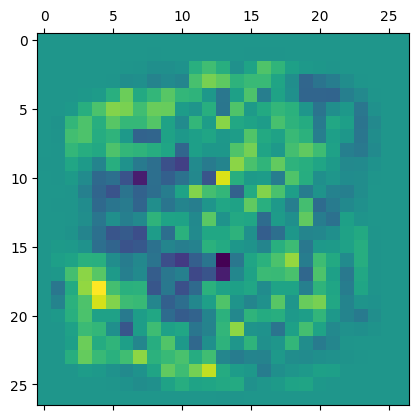

In [14]:
plt.matshow(pred.coef_[3].reshape((27, 27)))

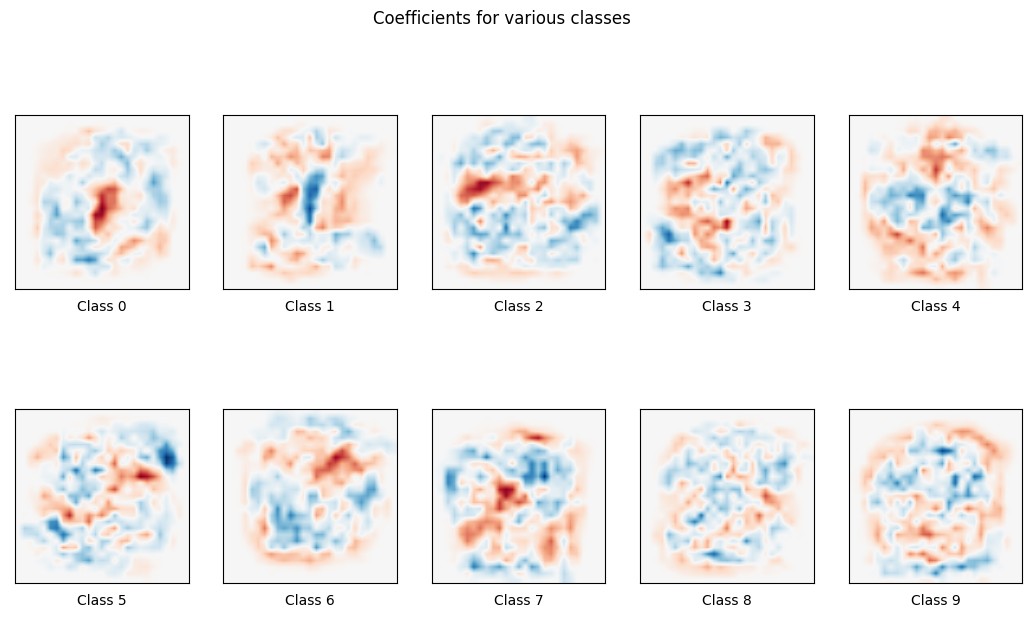

In [17]:
coef = pred.coef_.copy()
scale = np.abs(coef).max()
plt.figure(figsize=(13,7))

for i in range(10):
    cfs = plt.subplot(2, 5, i + 1)
    cfs.matshow(coef[i].reshape(27, 27), 
                cmap=plt.cm.RdBu,
                vmin=-scale, vmax=scale,
                interpolation='bilinear')
    
    cfs.set_xticks(())
    cfs.set_yticks(())
    cfs.set_xlabel(f'Class {i}')

plt.suptitle('Coefficients for various classes')